In [1]:
import numpy as np
from matplotlib import pyplot as plt
import scipy

Simplex: [[-3.13023663 -1.5822019 ]
 [-3.13024455 -1.5820526 ]
 [-3.1302906  -1.58212527]]
Optimum point: x= -3.1302 y= -1.5822
N iterations: 34
	


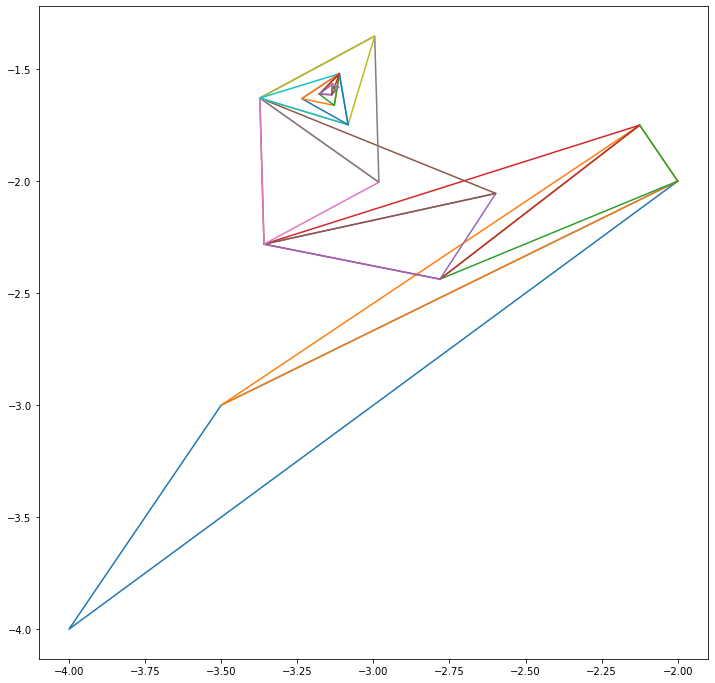

In [85]:
# 3. Nelder-Mead Method
# Function to optimize
def f(x):
    return np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0]-x[1])**2

# Initial simplex

x=np.array([[-2.,-2.],[-3.5,-3.],[-4.,-4.]])

# The Nelder-Mead Algorithm
def Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 1, β = 0.5, γ = 2):
    δ = 1
    plt.figure(figsize=(12,12))
    iterations = 0
    while δ > ϵ:
        iterations += 1
        # 1.Sort
        
        f_values = []
        for i in range(0, 3):
            f_values += [f(x[i])]
        f_values = np.array(f_values)
        x_sorted = x[np.argsort(f_values)]
        f_values_sorted = f_values[np.argsort(f_values)]

        # Plotting triangles
        
        plt.plot([i for i in  x.transpose()[0]]+[x[0][0]],[i for i in  x.transpose()[1]]+[x[0][1]])

        # 2.Center of gravity
        
        xc = (x_sorted[0] + x_sorted[-2])/2

        # 3.Reflection
        
        xr = (1 + α)*xc - α*x_sorted[-1]
        fr = f(xr)

        # 4. Comparison
        # 4.a
        if fr < f_values_sorted[0]:
            
            # Expansion
            
            xe = xc + γ*(xr-xc)
            fe = f(xe)
            if fe < f_values_sorted[0]:
                x_sorted[-1] = xe
            if fe > f_values_sorted[0]:
                x_sorted[-1] = xr
        # 4.b

        if f_values_sorted[0] < fr < f_values_sorted[-2]:
            x_sorted[-1] = xr

        # 4.c
        
        if f_values_sorted[-2] < fr < f_values_sorted[-1]:
            x_sorted[-1] = xr
            
            # 5. Contraction
            
            xs = xc + β*(x_sorted[-1]-xc)
            fs = f(xs)
            
            # 6.
            
            if fs < f_values_sorted[-1]:
                x_sorted[-1] = xs
                
            # 7.
            
            if fs > f_values_sorted[-1]:

                x_sorted[-1] = x_sorted[0] + (x_sorted[-1]-x_sorted[0])/2
                x_sorted[-2] = x_sorted[0] + (x_sorted[-2]-x_sorted[0])/2

         # 4.d
        
        if fr > f_values_sorted[-1]:
            
             # 5. Contraction
                
            xs = xc + β*(x_sorted[-1]-xc)
            fs = f(xs)
            
            # 6.
            
            if fs < f_values_sorted[-1]:
                x_sorted[-1] = xs
                
            # 7.
            
            if fs > f_values_sorted[-1]:

                x_sorted[-1] = x_sorted[0] + (x_sorted[-1]-x_sorted[0])/2
                x_sorted[-2] = x_sorted[0] + (x_sorted[-2]-x_sorted[0])/2
                
        # 8.Check convergence
        
        δ = np.linalg.norm(x_sorted[-1] - x_sorted[0])

        x=x_sorted
    print("Simplex:", x_sorted)
    print("Optimum point:","x=", round(x_sorted[0][0], 4),"y=", round(x_sorted[0][1], 4))
    print("N iterations:", iterations)
    print('\t')
Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 1, β = 0.5, γ = 2)    

The first point:
Simplex: [[-3.13023663 -1.5822019 ]
 [-3.13024455 -1.5820526 ]
 [-3.1302906  -1.58212527]]
Optimum point: x= -3.1302 y= -1.5822
N iterations: 34
	
The second point:
Simplex: [[-2.35640316 -2.35640316]
 [-2.35598068 -2.35598068]
 [-2.35634942 -2.35634942]]
Optimum point: x= -2.3564 y= -2.3564
N iterations: 17
	


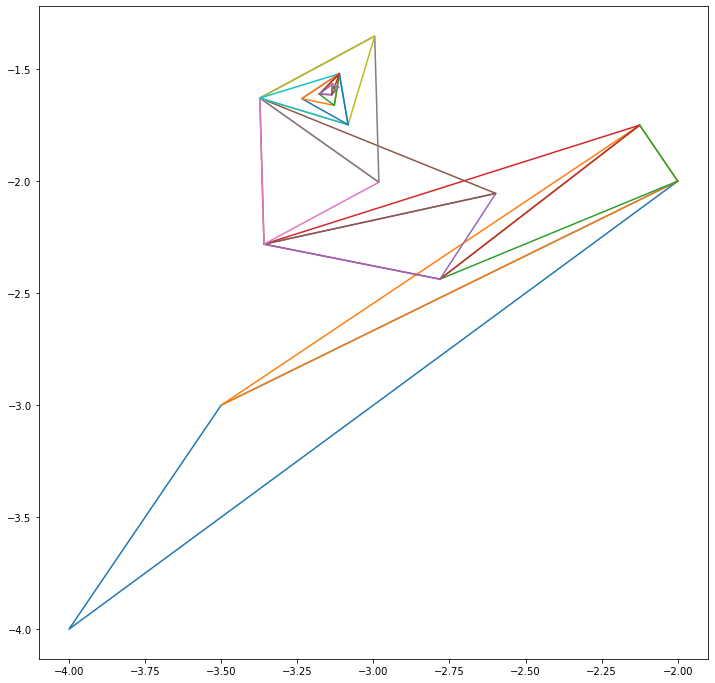

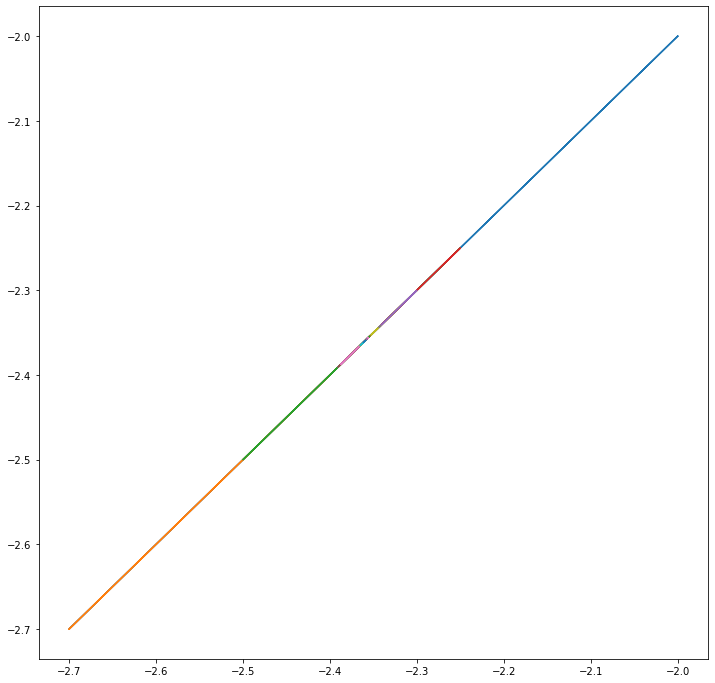

In [86]:
# 3.2 Demonstrate that the algorithm may converge to different points depending on the starting
# point.

def f(x):
    return np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0]-x[1])**2

# The first point
print('The first point:')
x=np.array([[-2.,-2.],[-3.5,-3.],[-4.,-4.]])
Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 1, β = 0.5, γ = 2)    

# The second point
print('The second point:')
x=np.array([[-2.,-2.],[-2.5,-2.5],[-2.7,-2.7]])
Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 1, β = 0.5, γ = 2) 

The first point:
Simplex: [[-3.13023663 -1.5822019 ]
 [-3.13024455 -1.5820526 ]
 [-3.1302906  -1.58212527]]
Optimum point: x= -3.1302 y= -1.5822
N iterations: 34
	
The second point:
Simplex: [[-3.345394   -1.93749921]
 [-3.34512523 -1.93768112]
 [-3.34543751 -1.93746881]]
Optimum point: x= -3.3454 y= -1.9375
N iterations: 88
	


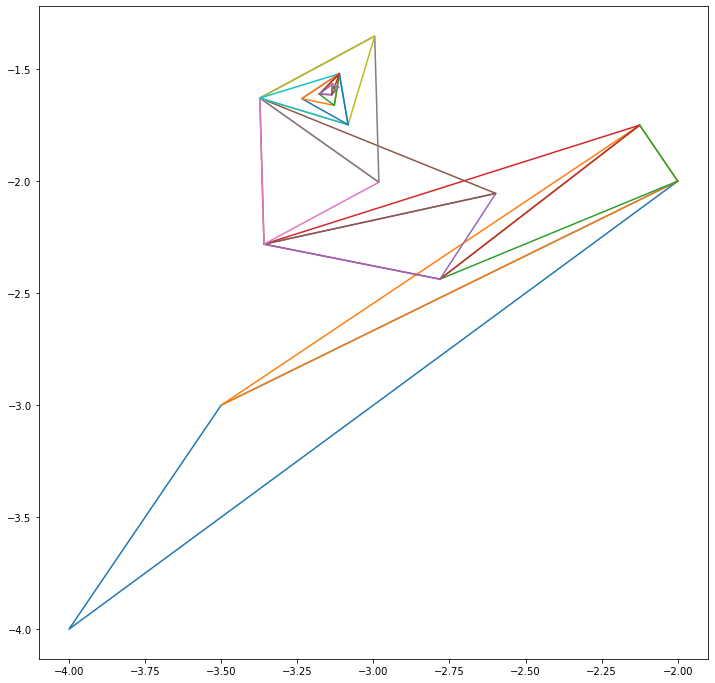

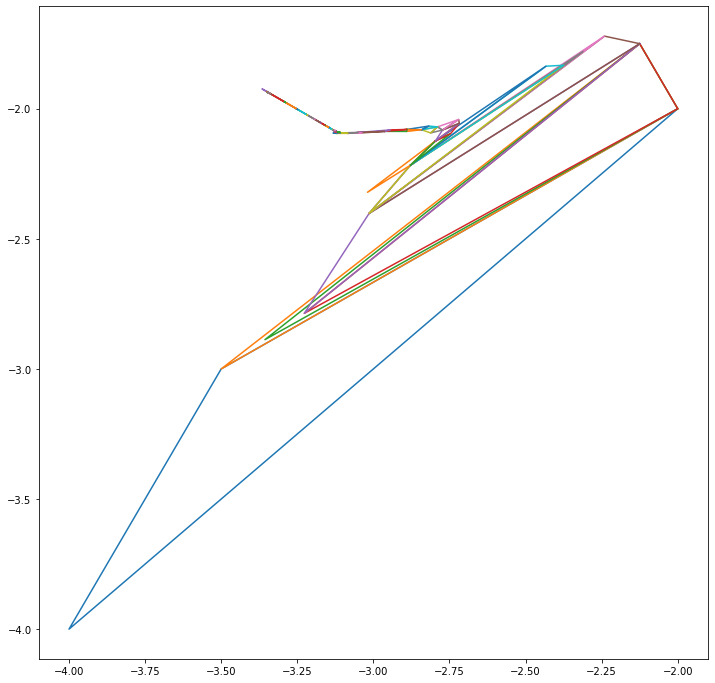

In [87]:
# 3.3 Examine the behavior of the method for various parameters α, β and γ. 

def f(x):
    return np.sin(x[1])*np.exp((1-np.cos(x[0]))**2) + np.cos(x[0])*np.exp((1-np.sin(x[1]))**2) + (x[0]-x[1])**2

# The first point
print('The first point:')
x=np.array([[-2.,-2.],[-3.5,-3.],[-4.,-4.]])
Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 1, β = 0.5, γ = 2)    

# The second point
print('The second point:')
x=np.array([[-2.,-2.],[-3.5,-3.],[-4.,-4.]])
Nelder_Mead_Algorithm(x, f, ϵ = 10**(-4), α = 0.5, β = 0.9, γ = 3) 

In [5]:
from sympy import Symbol, Derivative
import sympy as sp

α: 0.0394923883434493
α: 0.00872913542418255
α: 0.00483999549352434
α: 0.00374315672806739
α: 0.00364185546508763
α: 0.00364026285796735
α: 0.00363958591583305
x = -3.1302 y = -1.5821
N iterations: 7


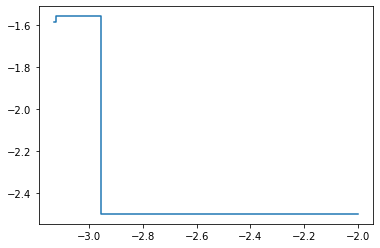

In [91]:
# 4.Coordinate descent
y= Symbol('y')
x= Symbol('x')

f = sp.sin(y)*sp.exp((1-sp.cos(x))**2) + sp.cos(x)*sp.exp((1-sp.sin(y))**2) + (x-y)**2


x0 = -2
y0 = -2.5
ϵ = 10**(-4)
x_p = [x0]
y_p = [y0]
δ = 1
iterations = 0
while δ > ϵ:

    iterations += 1
    
    dict = {x: x0, y: y0}
    
    # Lipshitz constant evaluation
    
    sec_deriv = sp.Matrix([sp.diff(sp.diff(f, x), x), sp.diff(sp.diff(f, y), y)]).evalf(subs=dict)
    L = abs(sec_deriv[np.argmax(abs(sec_deriv))])
    α = 1/L
    
    f1  = f.evalf(subs = dict)
    
    # Finding of the vector direction with highest gradient
    
    deriv_x = Derivative(f, x).doit().evalf(subs = dict)
    deriv_y = Derivative(f, y).doit().evalf(subs = dict)

    if abs(deriv_x) > abs(deriv_y):
        x0 = x0 - α*deriv_x
    if abs(deriv_x) < abs(deriv_y):
        y0 = y0 - α*deriv_y
        
    x_p += [x0]
    y_p += [y0]
    
    dict = {x: x0, y: y0}
    
    # Check convergence
    f2  = f.evalf(subs = dict)
    δ = f1 - f2
    print("α:", α)
    
print('x =',round(x0, 4),'y =', round(y0, 4))
print("N iterations:", iterations)
plt.plot(x_p, y_p)  

The Nelder-Mead algorithm has a relatively larger number of function calls since it is needed to estimate value of a function at each point of simplex and at the additional points during an iteration. The coordinate descent method has many evaluations of derivative, but it has lower amount of iterations because the step of every iteration is getting from higher to smaller with approaching optimal solution. Coordinate descent in the form with changing step (as in our case) is sensitive to the initial step. In principe it is possible to make it less sensitive if the step is additionally lowered, but it will increase number of iterations and thus number of function evaluations.